In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('results_mixed_0.csv')
# Replace all the Nans with 0s
df1 = df1.fillna(0)

df2 = pd.read_csv('results_mixed_1.csv')
# Replace all the Nans with 0s
df2 = df2.fillna(0)

# Concatenate the two dataframes
df = pd.concat([df1, df2], axis=0)

df = df[df["Dataset"] == "Imagenettewoof"]

In [2]:
methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()
upscale_methods = df["Upscale Method"].unique()
mixing_methods = df["Mixing Method"].unique()

In [3]:
print("Methods:", methods)
print("Layers:", layers)
print("Metrics:", metrics)
print("Upscale Methods:", upscale_methods)
print("Mixing Methods:", mixing_methods)

Methods: ['DeepLiftShap8' 'GradCAMPlusPlus']
Layers: ['features.20' 'features.15' 'features.10' 'features.5']
Metrics: ['road_combined']
Upscale Methods: ['ERFUpsamplingFast' 'bilinearUpsampling']
Mixing Methods: [0 'MultiplierMix']


In [4]:
df

,Image Index,Model,Dataset,Attribution Method,Layer,Metric,Upscale Method,Mixing Method,Value
4096,0,VGG11,Imagenettewoof,DeepLiftShap8,features.20,road_combined,ERFUpsamplingFast,0,0.087252
4097,0,VGG11,Imagenettewoof,DeepLiftShap8,features.20,road_combined,ERFUpsamplingFast,MultiplierMix,0.087340
4098,0,VGG11,Imagenettewoof,DeepLiftShap8,features.15,road_combined,ERFUpsamplingFast,0,0.120847
4099,0,VGG11,Imagenettewoof,DeepLiftShap8,features.15,road_combined,ERFUpsamplingFast,MultiplierMix,0.101077
4100,0,VGG11,Imagenettewoof,DeepLiftShap8,features.10,road_combined,ERFUpsamplingFast,0,0.150340
...,...,...,...,...,...,...,...,...,...
8037,499,VGG11,Imagenettewoof,GradCAMPlusPlus,features.15,road_combined,bilinearUpsampling,MultiplierMix,-0.064364
8038,499,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,road_combined,bilinearUpsampling,0,0.080568
8039,499,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,road_combined,bilinearUpsampling,MultiplierMix,-0.036226
8040,499,VGG11,Imagenettewoof,GradCAMPlusPlus,features.5,road_combined,bilinearUpsampling,0,0.049091


In [5]:
import sys
sys.path.append('../')

from models import vgg11_Imagenettewoof, vgg_preprocess
import torch
from data import imagenettewoof
model = vgg11_Imagenettewoof()
# Load weights
model.load_state_dict(torch.load("VGG11_Imagenettewoof.pt", map_location='cpu'))

test_data = imagenettewoof(root="../data", split="test", size="320px", download=False, transform=vgg_preprocess)

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

..\data\imagewoof2-320
['MaxPool2d']
{'features.20': 'MaxPool2d', 'features.15': 'MaxPool2d', 'features.10': 'MaxPool2d', 'features.5': 'MaxPool2d'}


In [10]:
# df_with_predictions = df.copy()
# Add a column for the prediction
# df_with_predictions["Correctly Classified"] = None
correctly_classified_index = []
from tqdm.auto import tqdm
# Iterate trough the all the df, take the image using index and see if the prediction is correct
indices = df["Image Index"].unique()
for index in tqdm(indices):
    # Get the image index
    # idx = int(row["Image Index"])
    # Get the image
    img, label = test_data[index]
    # Get the prediction
    pred = model(img.unsqueeze(0))
    pred = torch.argmax(pred, dim=1)
    if pred.item() == label:
        correctly_classified_index.append(index)
    # Check if the prediction is correct
    # df_with_predictions.at[i, "Correctly Classified"] = pred.item() == label
    # if pred != label:
    #     print(f"Image {idx} is misclassified. Predicted: {pred}, Label: {label}")


  0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
correctly_classified_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 127,
 128,
 129,
 73,
 75,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 205,


In [12]:
# Filter out not correctly classified images
df = df[df["Image Index"].isin(correctly_classified_index)]

In [16]:
df["Image Index"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  49,  50,  51,  52,  55,  56,
        57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,  69,  70,
       127, 128, 129,  73,  75,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 107, 108, 110, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 160,
       161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 20

ERFUpsamplingFast
      Image Index  Model         Dataset Attribution Method        Layer  \
4096            0  VGG11  Imagenettewoof      DeepLiftShap8  features.20   
4098            0  VGG11  Imagenettewoof      DeepLiftShap8  features.15   
4100            0  VGG11  Imagenettewoof      DeepLiftShap8  features.10   
4102            0  VGG11  Imagenettewoof      DeepLiftShap8   features.5   
4128            1  VGG11  Imagenettewoof      DeepLiftShap8  features.20   
...           ...    ...             ...                ...          ...   
7952          497  VGG11  Imagenettewoof      DeepLiftShap8   features.5   
7978          498  VGG11  Imagenettewoof      DeepLiftShap8  features.20   
7980          498  VGG11  Imagenettewoof      DeepLiftShap8  features.15   
7982          498  VGG11  Imagenettewoof      DeepLiftShap8  features.10   
7984          498  VGG11  Imagenettewoof      DeepLiftShap8   features.5   

             Metric     Upscale Method Mixing Method     Value  
4096

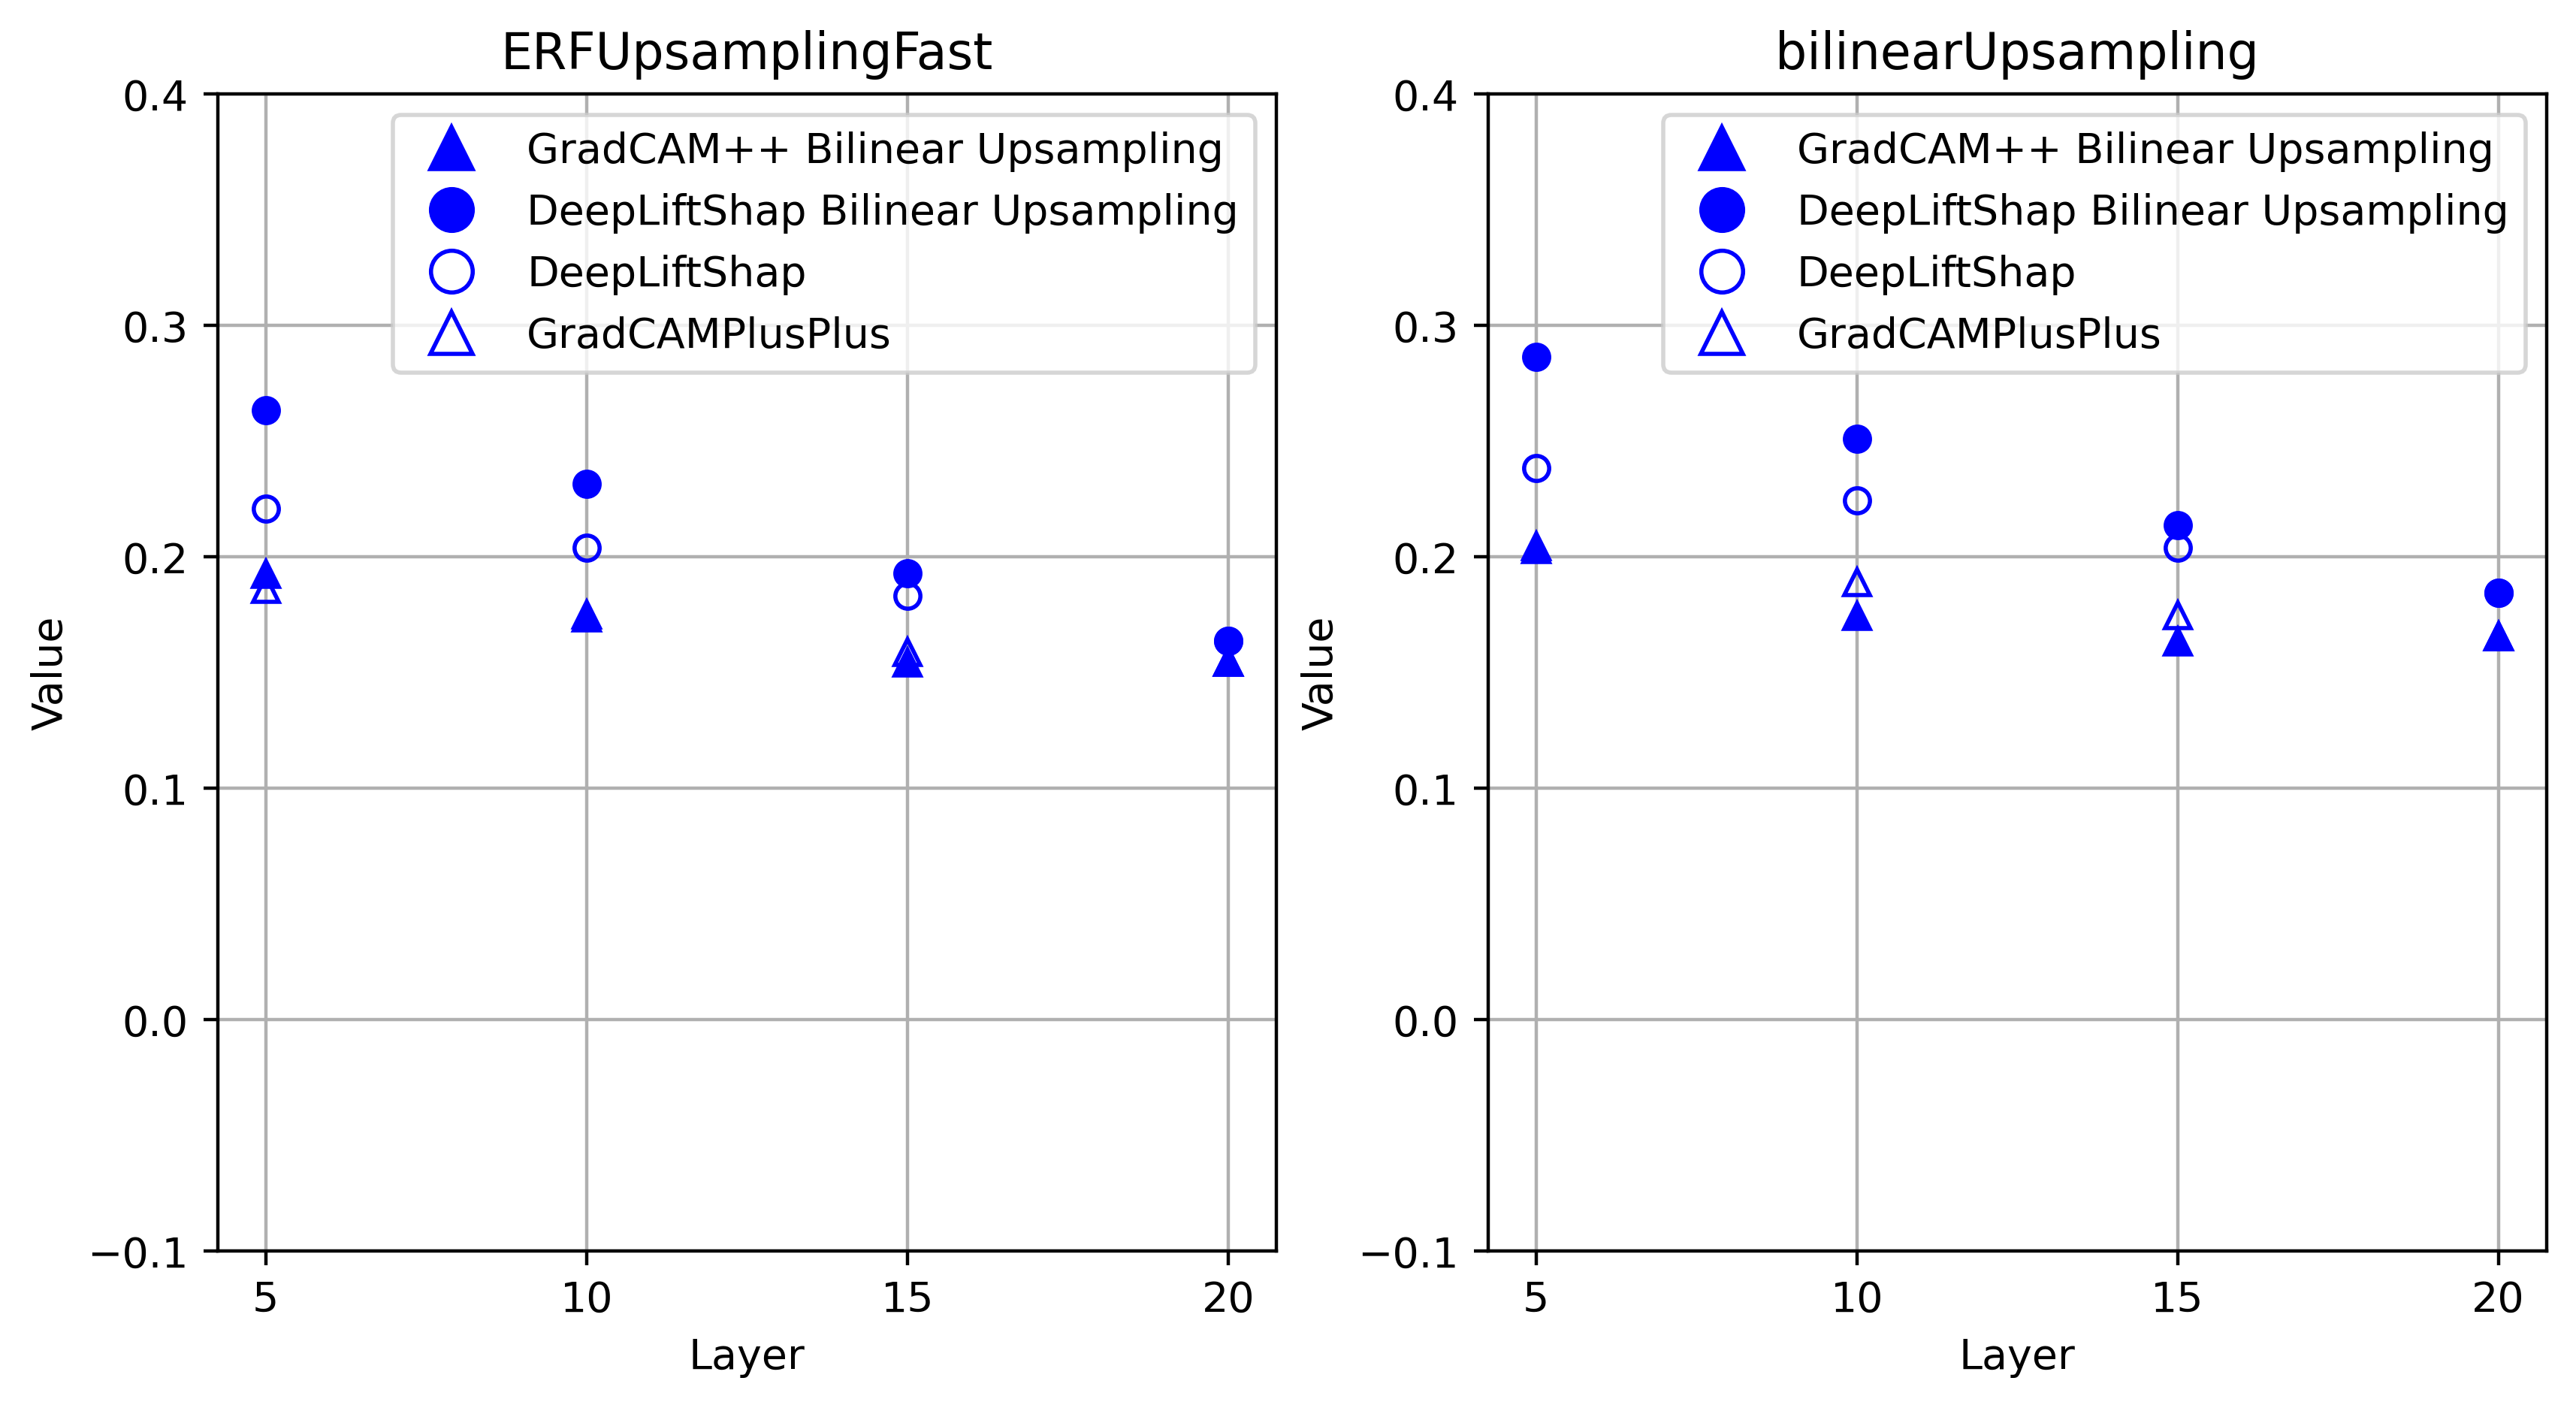

In [13]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# shape_for_upscale = {"ERFUpsampling": "P","SimpleUpsampling": "D"}  # Define shape mapping
shape_for_methods = {"GradCAMPlusPlus": "^","DeepLiftShap8": "o"}  # Define shape mapping

method_names = {"GradCAMPlusPlus": "GradCAM++ Bilinear Upsampling", "DeepLiftShap8": "DeepLiftShap Bilinear Upsampling"}  # Define shape mapping
# upscale_names = {"ERFUpsampling": "ERF Upsampling", "SimpleUpsampling": "Bilinear Upsampling"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

fig = plt.figure(figsize=(10,5), dpi=400)

metric = "road_combined"
# fig.text(0.05, 0.75, 'GradCAM++', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.25, 'DeepLiftShap', ha='center', va='center', fontsize=14) # , fontweight='bold')

# plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()

for index, upscale in enumerate(upscale_methods):
    print(upscale)
    plt.subplot(1, 2, index + 1)
    plt.title(upscale)
    for metric in metrics:
        for layer_type in types:
            for mix in mixing_methods:
                for j, attr_method in enumerate(methods):
                    res = df[(df["Upscale Method"] == upscale) &
                            (df["Metric"] == metric) &
                            (df["Attribution Method"] == attr_method) & 
                            (df["Mixing Method"] == mix)]
                    print(res)
                    res = res.groupby("Layer").agg({"Value": "mean"}).reset_index()
                    # Extract also the value std
                    print(res)
                    values = [res[res["Layer"] == f"features.{i}"]["Value"].values[0] for i in [5,10,15,20]]
                    # for i in [5,10,15,20]:
                    #     print(res[res["Layer"] == f"features.{i}"]["Value"].values[0])
                    # print(res)
                    # indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                    # print(indices)
                    # indices = [i for i in indices if i >= 10]
                    # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                    # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]
                    # Average the values across each layer
                    # for i in [5,10,15,20]:
                    #     print(values[indices == i])
                    # print(mix)
                    # print(values)
                    # print(indices)
                    # print(shape_for_methods)
                    # print(attr_method)
                    # print(shape_for_methods[attr_method])
                    if mix == "MultiplierMix":
                        # print("SimpleUpsampling")
                        plt.plot([5,10,15,20], values,shape_for_methods[attr_method],markerfacecolor= 'none', color=color_for_layers[types.index(layer_type)])
                    else:
                        plt.plot([5,10,15,20], values,shape_for_methods[attr_method], color=color_for_layers[types.index(layer_type)])
                        # print("ERFUpsampling")

                    plt.xlabel("Layer")
                    plt.ylabel("Value")
                    # Log scale for y
                    if metric == "sensitivity":
                        plt.yscale("log")

                    plt.ylim([-0.1, 0.4])
                    plt.grid(True)


    # Create color legend (Layer Types)
    # color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
    #                 for color, layer in zip(color_for_layers, types)]
    color_legend = []

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='blue', marker=shape, linestyle='None', markersize=10, label=method_names[upscale]) 
                    for upscale, shape in shape_for_methods.items()]
    
    upscale_legend = [mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label="DeepLiftShap", markerfacecolor= 'none'),
                      mlines.Line2D([], [], color='blue', marker='^', linestyle='None', markersize=10, label="GradCAMPlusPlus", markerfacecolor= 'none'),]
    
    plt.xticks([5,10,15,20])
    plt.legend(handles=color_legend + shape_legend + upscale_legend)

plt.savefig('results erf.pdf', dpi=400, bbox_inches='tight')


In [17]:
df[(df["Attribution Method"] == "DeepLiftShap8") & (df["Upscale Method"] == "ERFUpsamplingFast")].groupby(["Mixing Method", "Layer"]).agg({"Value": ["mean","std"]}).reset_index()

Mixing Method        Layer     Value          
                                   mean       std
0              0  features.10  0.231444  0.148932
1              0  features.15  0.192727  0.131079
2              0  features.20  0.163633  0.122395
3              0   features.5  0.263437  0.159946
4  MultiplierMix  features.10  0.203711  0.134785
5  MultiplierMix  features.15  0.183081  0.127880
6  MultiplierMix  features.20  0.163622  0.122391
7  MultiplierMix   features.5  0.220678  0.142803